In [ ]:
#import packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from gensim import models, corpora
from gensim.models import CoherenceModel




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#make a request
data1=requests.get("https://en.wikipedia.org/wiki/Telecommunications")
data2=requests.get("https://en.wikipedia.org/wiki/Telecommunications_in_India")
data3=requests.get("https://community.data.gov.in/amount-deposited-by-private-telecom-companies-as-part-of-licensing-agreement-as-on-28th-feb-2020/")

In [ ]:
#html format of the webpage
soup1=BeautifulSoup(data1.content,'html.parser')
soup2=BeautifulSoup(data2.content,'html.parser')
soup3=BeautifulSoup(data3.content,'html.parser')

In [ ]:
#webpage1
print(soup1)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Telecommunications - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feat

In [ ]:
#webpage2
print(soup2)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Telecommunications in India - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled ve

In [ ]:
#webpage3
print(soup3)


<!DOCTYPE html>

<!--[if IE 7]>
<html class="ie ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html class="ie ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 7) | !(IE 8)  ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
<meta content="telephone=no" name="format-detection">
<meta content="" name="description"/>
<meta content="" name="author"/>
<!--meta http-equiv="Content-Security-Policy" content="default-src *; style-src 'self' 'unsafe-inline' *; script-src 'self' 'unsafe-inline' 'unsafe-eval' *;font-src 'self' 'unsafe-inline' 'unsafe-eval' *;object-src 'self' *;"/-->
<!--[if lt IE 9]>
<script src="/js/html5.js" type="text/javascript"></script>
<![endif]-->
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<link href="https://community.data.gov.in/wp-content/themes/datablog/assets/images/favicon/favicon.ico" rel="shor

In [ ]:
#webpage1 (paragraph)
para1=soup1.find_all('p')
for p1 in para1:
  print(p1.get_text())



Telecommunication, often used in its plural form or abbreviated as telecom, is the transmission of information with an immediacy comparable to face-to-face communication. As such, slow communications technologies like postal mail and pneumatic tubes are excluded from the definition.[1][2] Many transmission media have been used for telecommunications throughout history, from smoke signals, beacons, semaphore telegraphs, signal flags, and optical heliographs  to wires and empty space made to carry electromagnetic signals. These paths of transmission may be divided into communication channels for multiplexing, allowing for a single medium to transmit several concurrent communication sessions. Several methods of long-distance communication before the modern era used sounds like coded drumbeats, the blowing of horns, and whistles. Long-distance technologies invented during the 20th and 21st centuries generally use electric power, and include the telegraph, telephone, television, and radio

In [ ]:
para2=soup2.find_all('p')
for p2 in para2:
  print(p2.get_text())






India's telecommunication network is the second largest in the world by number of telephone users[3] (both fixed and mobile phones) with over 1.1 billion subscribers as of December 2023.[4] It has one of the lowest call tariffs in the world enabled by multiple large-scale telecom operators and the ensuant hyper-competition between them. India has the world's second-largest Internet user-base with over 904 million broadband internet subscribers as of December 2023.[4]

Major sectors of the Indian telecommunication industry are the telephone, internet and television broadcast industries in the country which are involved in an ongoing process of developing into a next-generation network, increasingly employing an extensive array of modern network infrastructure such as digital telephone exchanges, network switching subsystems, media gateways and signaling gateways at the core, interconnected by a wide variety of transmission systems using optical fiber or microwave radio relay network

In [ ]:
para3=soup3.find_all('p')
for p3 in para3:
  print(p3.get_text())



Your session is expired. please relogin
Your session is about to expire. Do you want to regenerate it?
Please login using your email address as it is mandatory to access all the services of community.data.gov.in

Search



The total amount of Rs. 15,897.2 crore was deposited by private telecom companies as a part of licensing agreement as per directions of the Supreme Court of India as on 28th Feb 2020.
As on 28th Feb 2020, the highest amount of Rs. 9,500 crore was being deposited by Bharti Airtel Group of Companies as a part of licensing agreement as per directions of the Supreme Court of India, followed by Vodafone Idea Limited and Tata Group of Companies. Bharti Airtel Group of Companies accounted for 59.76% of the total amount deposited by private telecom companies as a part of licensing agreement as per directions of the Supreme Court of India as on 28.02.2020. The amount deposited by Vodafone Idea Limited was Rs. 3,500 crore as a part of licensing agreement as per directions of t

In [ ]:
text1=[p.text for p in para1]
text2=[p.text for p in para2]
text3=[p.text for p in para3]
df1=pd.DataFrame({"text" :text1})
df2=pd.DataFrame({"text" :text2})
df3=pd.DataFrame({"text" :text3})

In [ ]:
print(df1,df2,df3)



                                                 text
0                                                  \n
1   Telecommunication, often used in its plural fo...
2   Early telecommunication networks used metal wi...
3   Since the 1960s, the proliferation of digital ...
4   Telecommunication is a compound noun of the Gr...
..                                                ...
67  Wide area networks (WANs) are private computer...
68  In the mid-1980s, several sets of communicatio...
69  As the Internet grew in popularity and its tra...
70  Whereas Asynchronous Transfer Mode (ATM) or Mu...
71  Despite the modest popularity of Token Ring in...

[72 rows x 1 columns]                                                  text
0                                                  \n
1                                                  \n
2   India's telecommunication network is the secon...
3   Major sectors of the Indian telecommunication ...
4   The Indian telecom industry underwent a high r...
..   

In [ ]:
new_data=pd.concat([df1,df2,df3])
print(new_data)

                                                 text
0                                                  \n
1   Telecommunication, often used in its plural fo...
2   Early telecommunication networks used metal wi...
3   Since the 1960s, the proliferation of digital ...
4   Telecommunication is a compound noun of the Gr...
..                                                ...
9   Dataset URL: https://data.gov.in/resources/amo...
10  Resource Title: Amount Deposited by Private Te...
11  \n\nThis site is designed, hosted and maintain...
12  This site is designed, hosted and maintained b...
13             ogdp-community-deploy-676744f4d4-f9ntb

[154 rows x 1 columns]


In [ ]:
new_data.shape

(154, 1)

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#pre processing
import re
new_data['text'] = new_data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
new_data['text'] = new_data['text'].apply(lambda x: re.sub(r'\d+', '', x))
new_data['text'] = new_data['text'].apply(lambda x: re.sub(r'http\S+', '', x))
new_data['text'] = new_data['text'].str.lower()
new_data.head()


,text
0,\n
1,telecommunication often used in its plural for...
2,early telecommunication networks used metal wi...
3,since the s the proliferation of digital techn...
4,telecommunication is a compound noun of the gr...


In [ ]:
stop_words = set(stopwords.words('english'))

df = pd.concat([df1, df2, df3], ignore_index=True)
df['text_tokens']= df['text'].apply(word_tokenize)
direct=df['text_tokens']
df = df['text_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

print(df.head())

0                                                   []
1    [Telecommunication, ,, often, used, plural, fo...
2    [Early, telecommunication, networks, used, met...
3    [Since, 1960s, ,, proliferation, digital, tech...
4    [Telecommunication, compound, noun, Greek, pre...
Name: text_tokens, dtype: object


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(direct)
# Create Corpus
texts = df
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[]


In [ ]:
def calculate_coherence_score(corpus, id2word , k, texts):
    lda_model = models.LdaModel(corpus, num_topics=k, id2word=id2word)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word , coherence='c_v')
    return coherence_model_lda.get_coherence()

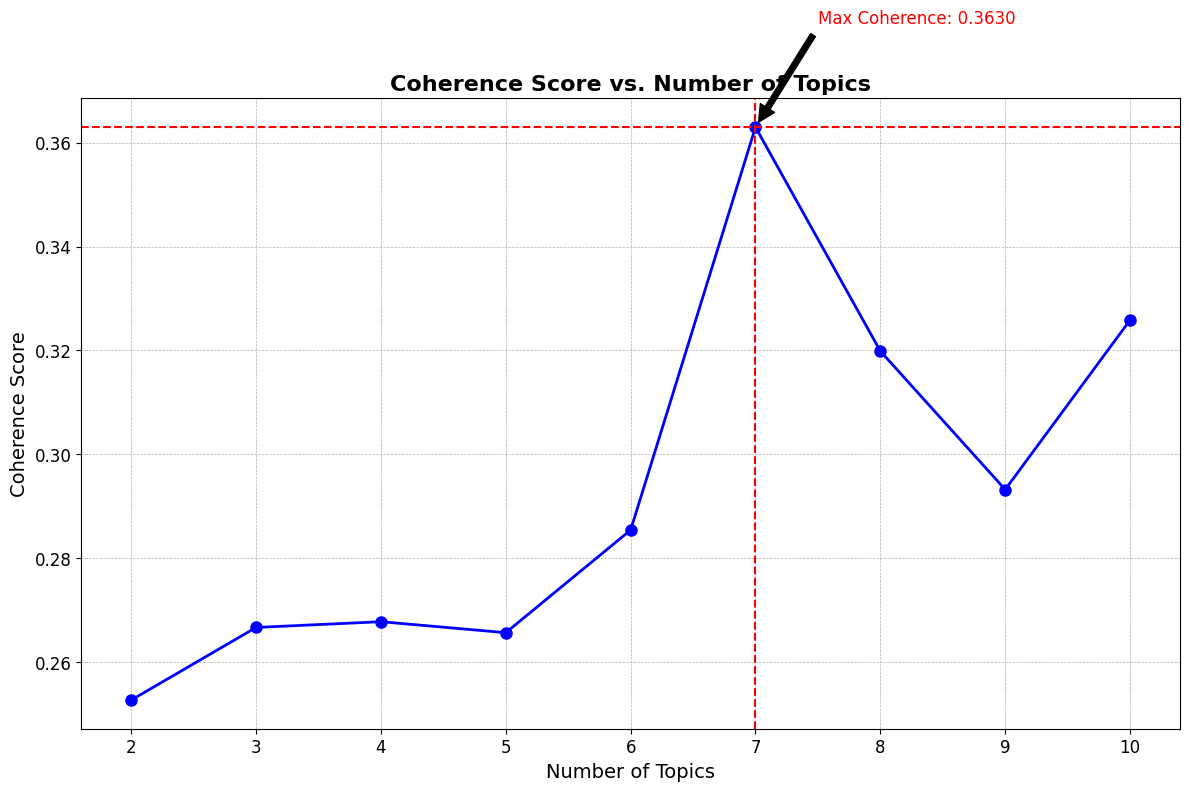

In [ ]:
# Define the range for the number of topics
min_topics = 2
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics + 1, step_size)

# List to store coherence scores
coherence_scores = []

# Iterate over the number of topics
for k in topics_range:
    # Train the LDA model
    lda_model = models.LdaModel(corpus, num_topics=k, id2word=id2word, passes=10, iterations=100)

    # Calculate coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)

# Plotting the coherence scores
plt.figure(figsize=(12, 8))
plt.plot(topics_range, coherence_scores, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
plt.xlabel("Number of Topics", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title("Coherence Score vs. Number of Topics", fontsize=16, fontweight='bold')
plt.xticks(topics_range, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=max(coherence_scores), color='r', linestyle='--', linewidth=1.5)
plt.axvline(x=topics_range[coherence_scores.index(max(coherence_scores))], color='r', linestyle='--', linewidth=1.5)
plt.annotate(f'Max Coherence: {max(coherence_scores):.4f}',
             xy=(topics_range[coherence_scores.index(max(coherence_scores))], max(coherence_scores)),
             xytext=(topics_range[coherence_scores.index(max(coherence_scores))] + 0.5, max(coherence_scores) + 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='red')
plt.tight_layout()
plt.show()


In [ ]:
from pprint import pprint
import gensim
num_topics = 5

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

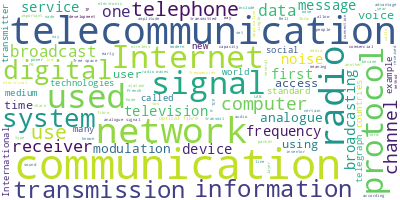

In [ ]:
#word cloud
#Topic 1
from wordcloud import WordCloud
long_string = ','.join(list(df1['text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

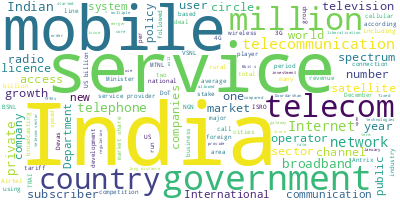

In [ ]:
#word cloud
#Topic 2
from wordcloud import WordCloud
long_string = ','.join(list(df2['text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

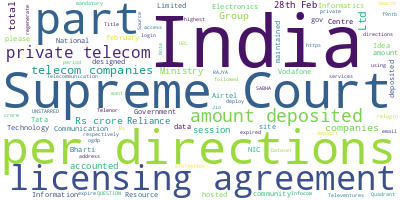

In [ ]:
#word cloud
#Topic 3
from wordcloud import WordCloud
long_string = ','.join(list(df3['text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()